<a href="https://colab.research.google.com/github/Ericson0372/CPSC-1820-Tutorial-ipynb/blob/main/Fall_2024_CPSC_1820_Tutorial_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as LetsPlot

# Worst-case analysis of Algorithms

In which we study the worst-case analysis of algorithms. We will look at several examples of code where we will identify the basic operation and write code to count it. Then, we will plot the count of the basic operation as a function of the input size. Critical to this study are i) the selection of the "right" basic operation -- there usually is more than one basic operation and a representation one would suffice; ii) the count should be an estimate in the worst-case (an upper bound on all inputs of a given size).

Let's begin with the code that finds the index of the largest element in a list of n numbers. The size of the input is determined by the length of the list, which we denote with `n`. The basic operation we choose is the predicate inside the while loop. The variable `count` is initially set to 0, and for each execution of the predicate, it is incremented by 1. We modify the return value to a 2-tuple `(m, count)` where `m` is the index of the largest element and `count` is the number of times predicate `i < len(a)` is evaluated.

Notice that
+ if maximum element occurs in two places then the smallest index is returned.
+ index `i` starts at 1. We don't have to compare the first element `a[0]` with itself.
+ The input `[1,2,3,4,5,6]` is the worst-case input. All the elements are visited before the maximum element `n` is found in the example `max([1,2,3,4,5,6])`.

In [1]:
# Input :: a_1, a_2, ..., a_n
# Output :: index m such that a_m >= a_i for all i != m
# array index starts at 0
def max1(a):
    m = 0
    i = 1
    count = 0
    while (i < len(a)):
        count = count + 1
        if (a[i] >= a[m]):
            m = i
        i = i+1
    return (m, count)


print(max1([1,2,3,4,5,6]))

(5, 5)


In [4]:
def first_n(n):
      num, nums = 0, []
      while num < n:
         nums.append(num)
         num += 1
      return nums

first_n(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Assignment I

Suppose we change the basic operation to `i=i+1`.  Modify the code above to count how often `i=i+1` is executed.

In [15]:
def max2(a):
  m = 0
  i = 1
  count = 0
  count2 = 0
  while (i < len(a)): 
    count = count + 1
    if (a[i] >= a[m]):
      m = i
    i = i+1
    count2 += 1
  return (m, count, "i = i+1 was counted: " + str(count2) + " times" )


print(max2([1,2,3,4,5,6,7,8,9])) # best case
print(max2(list(reversed([1,2,3,4,5,6,7,8,9])))) # worse case

(8, 8, 'i = i+1 was counted: 8 times')
(0, 8, 'i = i+1 was counted: 8 times')


To plot the count of the basic operation against the input size, we need to execute the `max` function on a list of sizes ranging from 1 to 100. Each list will contain elements 1, 2, 3, ..., n, where n ranges from 1 to 100. This means we will be running 100 experiments by calling the `max` function. The code for executing these experiments can be found below.

We are using the list comprehension syntax in python to write this code succintly. Do not worry about the syntax at this point. `range(a,b)` creates a list of numbers `[a,a+1, ..., b-2, b-1]`. If n is in `range(a,b)` then `range(1,n)` creates the list `[1, 2, n-1]`. Suppose `n=a` then the list created by `range(1,n) = range(1,a) = 1, 2, ..., a-1`.  

We have also used `[1]` at the end of the call to the `max1` function.
Since `max1` returns a 2-tuple, we can extract the `count` by accessing the second element of the tuple using the index `[1]`.

The various values of `count` (as a function of the input size) is in the list `ans`. Finally, we plot the list containing `count` using the plot function (from the matplotlib.pyplot) library.

In [4]:
import matplotlib.pyplot as LetsPlot

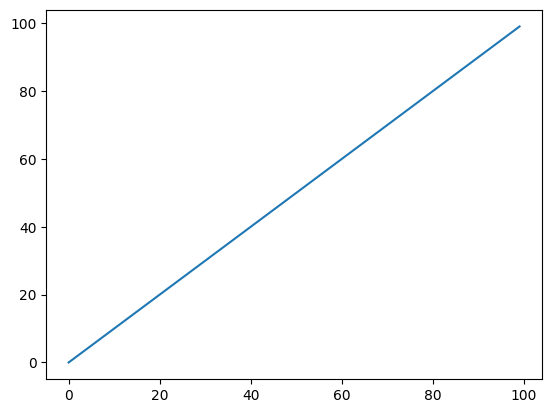

In [43]:
ans = [max1(range(1,n))[1] for n in range(2,102)]
LetsPlot.plot(ans)

## Assignment II

Now consider the code for linear search that we discussed in the class. The code is shown below. Perform the following tasks:

1. Identify a basic operation in this code.
2. Modify the code to count the number of times the basic operation is performed.
3. Execute the function `find` on inputs [1,..,n] where n varies from 1 to 100, and k=0 to collect the `count` as a function of the input size. The key `k` is not in the input list. These inputs are the worst-case inputs (as all the elements in the list will have to be examined).
4. Plot the `count` as a function of `n`.

In [16]:
# modify this code to count the basic operation
# the return statement shoulds return a 2-tuple (index, count), so modify them
# update count in the "right" place

def find(a, k):
    count = 0
    for i in range(1,len(a)):
      count += 1
      if (a[i] == k):
        return (i, count)
    return None  #if not found return None

print(find(range(0,100), -9))
print(find(range(0,100), 50))


None
(50, 50)


In [ ]:
# use the code from above (modify it) to collect the statistics from function find
# and plot the count, for the loop the range should be range(1,100), for find range is range(1,n)

def find_modified(a, k):
    count = 0
    for i in range(1,len(k)):
      count += 1
      if (a[i] == k):
        return (i, count)
    return None  #if not found return None

plotval = [find(range(1,n)) for n in range(1,100) if find(range(1,n)) is not None]
LetsPlot.plot(plotval)


TypeError: find() missing 1 required positional argument: 'k'

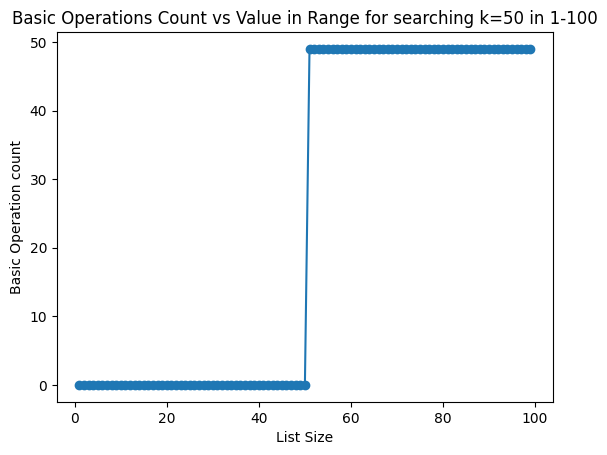

In [ ]:
# use the code from above (modify it) to collect the statistics from function find
# and plot the count, for the loop the range should be range(1,100), for find range is range(1,n)
#plotval = [find(list(range(1,100)),50)[1] for x in range(1,100) if find(list(range(1,100)), 50) is not None]
#LetsPlot.plot(plotval)
k = 50
n_range = range(1,100)
counts = [] # this will act as the x axis in the plot
for n in n_range:
    result = find(range(1,n),k)
    if result is not None:
        counts.append(result[1])
    else: 
        counts.append(0)
LetsPlot.plot(n_range, counts, marker='o', linestyle='-')
LetsPlot.xlabel('List Size')
LetsPlot.ylabel('Basic Operation count')
LetsPlot.title('Basic Operations Count vs Value in Range for searching k=50 in 1-100')
LetsPlot.show() 




# Assignment III

Consider the code below. It uses two `for` loops that are nested. Perform the following tasks:

+ Identify the basic operation.
+ Identify the input size.
+ Modify the code to count the number of basic operations.
+ Plot the `count` as a function of the input size.
+ What conclusions can you draw from the plot, write your answer in prose form below.



In [2]:
# modify this code to count the basic operation
# the return statement shoulds return the count
# update count in the "right" place

def nested(n):
  BasicOpCount = 0
  for i in range(1,n):
    for j in range(1,n):
      if (i!=j):
        print(i,"-",j)
        BasicOpCount += 1 
  return BasicOpCount

print(nested(4))

1 - 2
1 - 3
2 - 1
2 - 3
3 - 1
3 - 2
6


In [10]:
from collections import Counter

1 - 2
2 - 1
1 - 2
1 - 3
2 - 1
2 - 3
3 - 1
3 - 2
1 - 2
1 - 3
1 - 4
2 - 1
2 - 3
2 - 4
3 - 1
3 - 2
3 - 4
4 - 1
4 - 2
4 - 3
1 - 2
1 - 3
1 - 4
1 - 5
2 - 1
2 - 3
2 - 4
2 - 5
3 - 1
3 - 2
3 - 4
3 - 5
4 - 1
4 - 2
4 - 3
4 - 5
5 - 1
5 - 2
5 - 3
5 - 4
1 - 2
1 - 3
1 - 4
1 - 5
1 - 6
2 - 1
2 - 3
2 - 4
2 - 5
2 - 6
3 - 1
3 - 2
3 - 4
3 - 5
3 - 6
4 - 1
4 - 2
4 - 3
4 - 5
4 - 6
5 - 1
5 - 2
5 - 3
5 - 4
5 - 6
6 - 1
6 - 2
6 - 3
6 - 4
6 - 5
1 - 2
1 - 3
1 - 4
1 - 5
1 - 6
1 - 7
2 - 1
2 - 3
2 - 4
2 - 5
2 - 6
2 - 7
3 - 1
3 - 2
3 - 4
3 - 5
3 - 6
3 - 7
4 - 1
4 - 2
4 - 3
4 - 5
4 - 6
4 - 7
5 - 1
5 - 2
5 - 3
5 - 4
5 - 6
5 - 7
6 - 1
6 - 2
6 - 3
6 - 4
6 - 5
6 - 7
7 - 1
7 - 2
7 - 3
7 - 4
7 - 5
7 - 6
1 - 2
1 - 3
1 - 4
1 - 5
1 - 6
1 - 7
1 - 8
2 - 1
2 - 3
2 - 4
2 - 5
2 - 6
2 - 7
2 - 8
3 - 1
3 - 2
3 - 4
3 - 5
3 - 6
3 - 7
3 - 8
4 - 1
4 - 2
4 - 3
4 - 5
4 - 6
4 - 7
4 - 8
5 - 1
5 - 2
5 - 3
5 - 4
5 - 6
5 - 7
5 - 8
6 - 1
6 - 2
6 - 3
6 - 4
6 - 5
6 - 7
6 - 8
7 - 1
7 - 2
7 - 3
7 - 4
7 - 5
7 - 6
7 - 8
8 - 1
8 - 2
8 - 3
8 - 4
8 - 5
8 - 

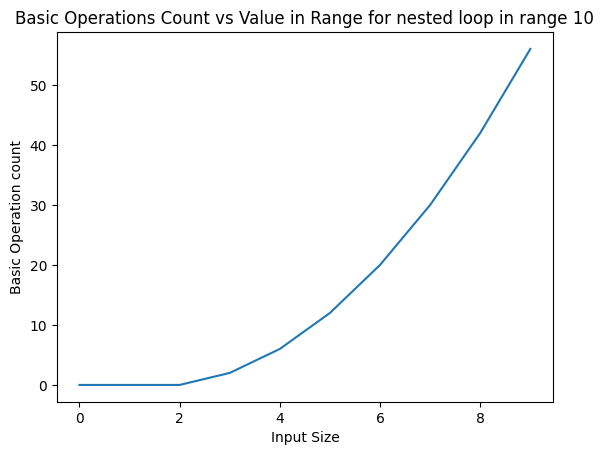

In [ ]:
# write the code for collecting the stats and plotting the count in this cell
# nested only returns count value, and use the range(10) while plotting 
ans = [nested(n) for n in range(10)]
LetsPlot.plot(ans)
LetsPlot.xlabel('Input Size')
LetsPlot.ylabel('Basic Operation count')
LetsPlot.title('Basic Operations Count vs Value in Range for nested loop in range 10')
LetsPlot.show()



###Conclusions:
**What are the differences observable between the plots of Assignment II and Assignment III? Explain these differences in terms of time complexity.**

*write your answer below*